In [1]:
base_path = "/content/drive/My Drive/Github/mtc-device-activation"

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')# Load saved data

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [4]:
!apt-get update
!apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,923 kB]
Get:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 Packages [32.9 kB]
Get:13 https://ppa.la

In [5]:
# === Load general simulation data ===
data = np.load(f"{base_path}/communication_model/data/communication_simulation_general.npz", allow_pickle=True)
snr_db_array = data["snr_db_array"]
pilot_length_array = data["pilot_length_array"]
M = data["M"]

# === Load ground truth ===
all_gamma = np.load(f"{base_path}/communication_model/data/communication_simulation_gamma.npz", allow_pickle=True)["all_gamma"]  # (S, N)
all_z     = np.load(f"{base_path}/communication_model/data/communication_simulation_z.npz", allow_pickle=True)["all_z"]        # (S, N, M)

def load_estimates(folder_name, file_prefix, num_sets=5):
    """Loads and concatenates z and gamma results."""
    file_paths = [
        f"{base_path}/estimation/{folder_name}/data/{file_prefix}_set_{i}.npz"
        for i in range(1, num_sets + 1)
    ]
    z_list, g_list = [], []
    for path in file_paths:
        est = np.load(path, allow_pickle=True)
        z_list.append(est["z_result_all"])          # (S_i, *, N, M)
        g_list.append(est["gamma_result_all"])      # (S_i, *, N)
    return np.concatenate(z_list, axis=0), np.concatenate(g_list, axis=0)

def load_estimates_z_only(folder_name, file_prefix, num_sets=5):
    """Loads and concatenates z results only (no gamma)."""
    file_paths = [
        f"{base_path}/estimation/{folder_name}/data/{file_prefix}_set_{i}.npz"
        for i in range(1, num_sets + 1)
    ]
    z_list = []
    for path in file_paths:
        est = np.load(path, allow_pickle=True)
        z_list.append(est["z_result_all"])          # (S_i, *, N, M)
    return np.concatenate(z_list, axis=0)

# ---------------------------
# 1) FIXED PILOT LENGTH (varying SNR)
# ---------------------------
pilot_length_fixed = 30
folder_fixedPL = f"snr_db_all_pilot_length_{int(pilot_length_fixed)}"

pl_prefix = {
    "casbl":    f"casbl_snr_db_all_pilot_length_{int(pilot_length_fixed)}",
    "casbl_uc": f"casbl_uc_snr_db_all_pilot_length_{int(pilot_length_fixed)}",
    "sbl":      f"sbl_snr_db_all_pilot_length_{int(pilot_length_fixed)}",
    "cosamp":   f"cosamp_snr_db_all_pilot_length_{int(pilot_length_fixed)}",  # z only
    "omp":      f"omp_snr_db_all_pilot_length_{int(pilot_length_fixed)}"      # z only
}

results_pl = {}
results_pl["z_est_casbl"],    results_pl["gamma_est_casbl"]    = load_estimates(folder_fixedPL, pl_prefix["casbl"])
results_pl["z_est_casbl_uc"], results_pl["gamma_est_casbl_uc"] = load_estimates(folder_fixedPL, pl_prefix["casbl_uc"])
results_pl["z_est_sbl"],      results_pl["gamma_est_sbl"]      = load_estimates(folder_fixedPL, pl_prefix["sbl"])
results_pl["z_est_cosamp"] = load_estimates_z_only(folder_fixedPL, pl_prefix["cosamp"])
results_pl["z_est_omp"]    = load_estimates_z_only(folder_fixedPL, pl_prefix["omp"])

# ---------------------------
# 2) FIXED SNR (varying pilot length)
# ---------------------------
snr_db_fixed = 12
folder_fixedSNR = f"snr_db_{int(snr_db_fixed)}_pilot_length_all"

snr_prefix = {
    "casbl":    f"casbl_snr_db_{int(snr_db_fixed)}_pilot_length_all",
    "casbl_uc": f"casbl_uc_snr_db_{int(snr_db_fixed)}_pilot_length_all",
    "sbl":      f"sbl_snr_db_{int(snr_db_fixed)}_pilot_length_all",
    "cosamp":   f"cosamp_snr_db_{int(snr_db_fixed)}_pilot_length_all",  # z only
    "omp":      f"omp_snr_db_{int(snr_db_fixed)}_pilot_length_all"      # z only
}

results_snr = {}
results_snr["z_est_casbl"],    results_snr["gamma_est_casbl"]    = load_estimates(folder_fixedSNR, snr_prefix["casbl"])
results_snr["z_est_casbl_uc"], results_snr["gamma_est_casbl_uc"] = load_estimates(folder_fixedSNR, snr_prefix["casbl_uc"])
results_snr["z_est_sbl"],      results_snr["gamma_est_sbl"]      = load_estimates(folder_fixedSNR, snr_prefix["sbl"])
results_snr["z_est_cosamp"] = load_estimates_z_only(folder_fixedSNR, snr_prefix["cosamp"])
results_snr["z_est_omp"]    = load_estimates_z_only(folder_fixedSNR, snr_prefix["omp"])

# Example usage:
# - Fixed PL results: results_pl["z_est_casbl"], results_pl["gamma_est_casbl"], results_pl["z_est_omp"], ...
# - Fixed SNR results: results_snr["z_est_sbl"], results_snr["gamma_est_sbl"], results_snr["z_est_cosamp"], ...

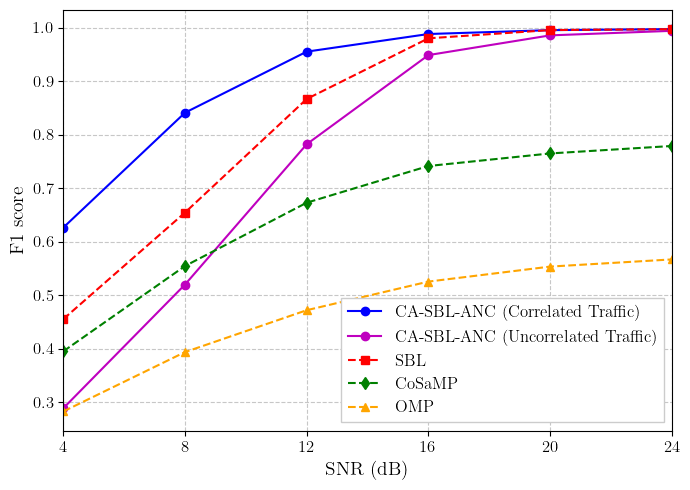

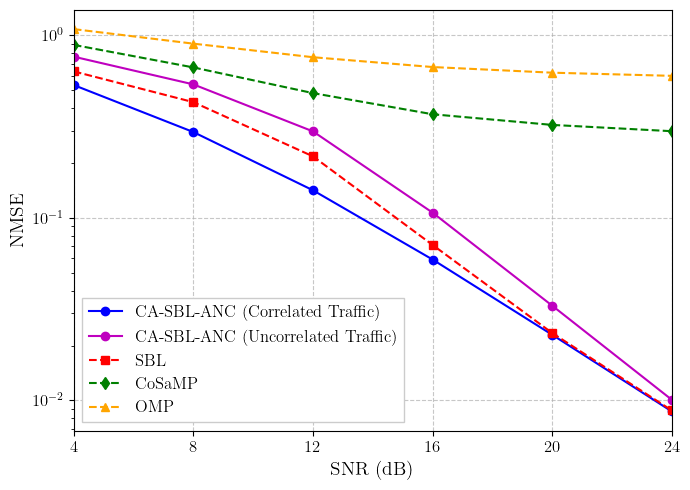

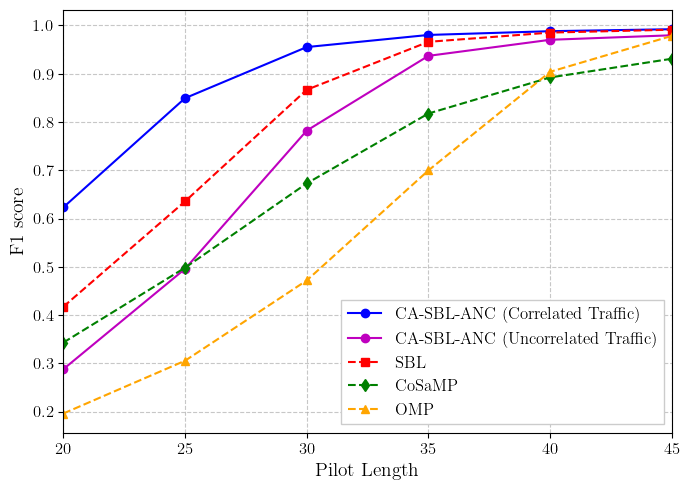

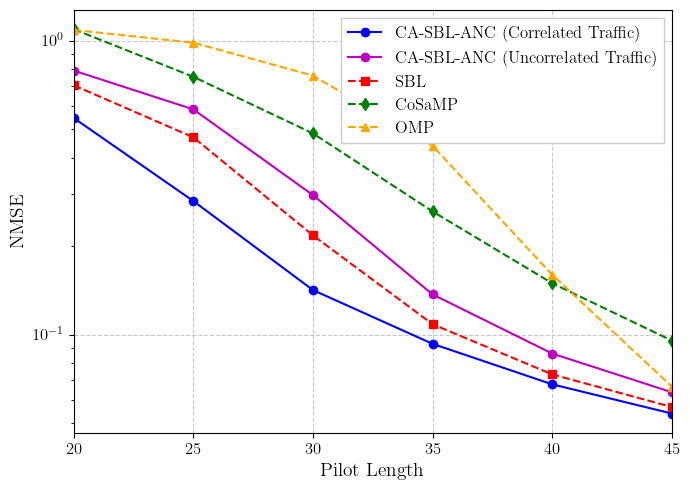

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Converters
# =========================

def z_object2array(z_obj):
    """
    Accepts:
      - numeric ndarray (S, K, N, M) → returned as-is
      - object ndarray (S, K) with each cell of shape (N, M) → stacked to (S, K, N, M)
    """
    z_arr = np.asarray(z_obj)
    if isinstance(z_obj, np.ndarray) and z_obj.dtype == object and z_obj.ndim == 2:
        S, K = z_obj.shape
        # find first valid cell to infer (N, M)
        s0, k0 = 0, 0
        while (z_obj[s0, k0] is None) or (np.asarray(z_obj[s0, k0]).ndim == 0):
            k0 += 1
            if k0 == K:
                s0 += 1; k0 = 0
            if s0 == S:
                raise ValueError("z_object2array: could not find a valid (N, M) matrix.")
        n0 = np.asarray(z_obj[s0, k0])
        if n0.ndim != 2:
            raise ValueError(f"z_object2array: expected (N, M) in cells, got {n0.shape}")
        N, M = n0.shape
        out = np.zeros((S, K, N, M), dtype=n0.dtype)
        for s in range(S):
            for k in range(K):
                out[s, k] = np.asarray(z_obj[s, k])
        return out
    return z_arr  # assume already (S, K, N, M)

def gamma_object2bool(g_obj, tau=0.15):
    """
    g_obj: (S, K) object array; each cell is (N,) soft-gamma (possibly complex).
    returns: (S, K, N) boolean after |.| > tau.
    """
    if not isinstance(g_obj, np.ndarray) or g_obj.dtype != object or g_obj.ndim != 2:
        raise ValueError("gamma_object2bool expects a (S, K) object ndarray.")
    S, K = g_obj.shape
    # infer N from first valid cell
    s0, k0 = 0, 0
    while (g_obj[s0, k0] is None) or (np.asarray(g_obj[s0, k0]).ndim == 0):
        k0 += 1
        if k0 == K:
            s0 += 1; k0 = 0
        if s0 == S:
            raise ValueError("gamma_object2bool: could not find a valid vector to infer N.")
    v0 = np.asarray(g_obj[s0, k0])
    if v0.ndim != 1:
        raise ValueError(f"gamma_object2bool: expected (N,) vectors in cells, got {v0.shape}")
    N = v0.shape[0]

    g_bool = np.zeros((S, K, N), dtype=bool)
    for s in range(S):
        for k in range(K):
            v = np.asarray(g_obj[s, k])
            if np.iscomplexobj(v):
                v = np.abs(v)
            g_bool[s, k] = v > tau
    return g_bool

# =========================
# Metrics (boolean)
# =========================

def binary_gamma_from_z_bool(z_est, thr=1e-6):
    """
    z_est: (S, K, N, M) → boolean (S, K, N) using row-norm across antennas.
    """
    energies = np.linalg.norm(z_est, axis=-1)  # (S, K, N)
    return energies > thr

def f1_from_gamma_bool(g_true, g_hat):
    TP = np.sum(g_hat & g_true)
    FP = np.sum(g_hat & (~g_true))
    FN = np.sum((~g_hat) & g_true)
    p = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    r = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    return (2 * p * r / (p + r)) if (p + r) > 0 else 0.0

def nmse_over_support(z_true, z_hat, g_true):
    A = np.where(g_true)[0]
    if A.size == 0:
        return np.nan
    num = np.linalg.norm(z_true[A] - z_hat[A])**2
    den = np.linalg.norm(z_true[A])**2
    return num / den if den > 0 else np.nan

def f1_vs_axis_bool(all_gamma_true, g_axis_bool):
    """
    all_gamma_true: (S, N) numeric {0,1} or boolean
    g_axis_bool:    (S, K, N) boolean
    returns: (K,) F1 averaged over S
    """
    g_true = (all_gamma_true != 0)
    S, K, _ = g_axis_bool.shape
    out = np.zeros(K, dtype=float)
    for k in range(K):
        out[k] = np.mean([f1_from_gamma_bool(g_true[s], g_axis_bool[s, k]) for s in range(S)])
    return out

def nmse_vs_axis(all_z_true, all_gamma_true, z_axis):
    """
    all_z_true: (S, N, M)
    all_gamma_true: (S, N)
    z_axis: (S, K, N, M)
    """
    g_true = (all_gamma_true != 0)
    S, K, _, _ = z_axis.shape
    out = np.zeros(K, dtype=float)
    for k in range(K):
        vals = []
        for s in range(S):
            n = nmse_over_support(all_z_true[s], z_axis[s, k], g_true[s])
            if not np.isnan(n):
                vals.append(n)
        out[k] = np.mean(vals) if vals else np.nan
    return out

# =========================
# Wrappers for fixed PL / fixed SNR
# =========================

def metrics_fixed_pl_bool(all_z_true, all_gamma_true, results_pl, tau=0.15, z_thr=1e-6):
    """
    results_pl must contain:
      - z_est_casbl,    gamma_est_casbl      (gamma: (S,K) object of (N,))
      - z_est_casbl_uc, gamma_est_casbl_uc
      - z_est_sbl,      gamma_est_sbl
      - z_est_omp                                # z only
      - z_est_cosamp                             # z only
    Returns: {alg: {"F1": (K,), "NMSE": (K,)}}, where K = num_snr
    """
    curves = {}

    # Soft-gamma algs
    for alg in ["casbl", "casbl_uc", "sbl"]:
        z_axis = z_object2array(results_pl[f"z_est_{alg}"])     # (S, K, N, M)
        g_axis_bool = gamma_object2bool(results_pl[f"gamma_est_{alg}"], tau=tau)  # (S, K, N)
        curves[alg] = {
            "F1":   f1_vs_axis_bool(all_gamma_true, g_axis_bool),
            "NMSE": nmse_vs_axis(all_z_true, all_gamma_true, z_axis),
        }

    # z-only algs
    for alg in ["omp", "cosamp"]:
        z_axis = z_object2array(results_pl[f"z_est_{alg}"])
        g_axis_bool = binary_gamma_from_z_bool(z_axis, thr=z_thr)
        curves[alg] = {
            "F1":   f1_vs_axis_bool(all_gamma_true, g_axis_bool),
            "NMSE": nmse_vs_axis(all_z_true, all_gamma_true, z_axis),
        }

    return curves

def metrics_fixed_snr_bool(all_z_true, all_gamma_true, results_snr, tau=0.15, z_thr=1e-6):
    """
    results_snr must contain analogous keys as results_pl but for varying PL.
    Returns: {alg: {"F1": (K,), "NMSE": (K,)}} where K = num_pl
    """
    curves = {}

    for alg in ["casbl", "casbl_uc", "sbl"]:
        z_axis = z_object2array(results_snr[f"z_est_{alg}"])
        g_axis_bool = gamma_object2bool(results_snr[f"gamma_est_{alg}"], tau=tau)
        curves[alg] = {
            "F1":   f1_vs_axis_bool(all_gamma_true, g_axis_bool),
            "NMSE": nmse_vs_axis(all_z_true, all_gamma_true, z_axis),
        }

    for alg in ["omp", "cosamp"]:
        z_axis = z_object2array(results_snr[f"z_est_{alg}"])
        g_axis_bool = binary_gamma_from_z_bool(z_axis, thr=z_thr)
        curves[alg] = {
            "F1":   f1_vs_axis_bool(all_gamma_true, g_axis_bool),
            "NMSE": nmse_vs_axis(all_z_true, all_gamma_true, z_axis),
        }

    return curves

# =========================
# Example usage (expects: all_z, all_gamma, results_pl, results_snr, snr_db_array, pilot_length_array)
# =========================

# Compute curves
curves_pl  = metrics_fixed_pl_bool(all_z, all_gamma, results_pl,  tau=0.15, z_thr=1e-6)   # vs SNR
curves_snr = metrics_fixed_snr_bool(all_z, all_gamma, results_snr, tau=0.15, z_thr=1e-6)  # vs PL

# Build axes
algs = ["casbl", "casbl_uc", "sbl", "cosamp", "omp"]
num_snr_points = next(len(curves_pl[a]["F1"]) for a in algs if a in curves_pl)
num_pl_points  = next(len(curves_snr[a]["F1"]) for a in algs if a in curves_snr)
x_snr = np.array(snr_db_array[:num_snr_points])
x_pl  = np.array(pilot_length_array[:num_pl_points])

# Optional: collect to dicts for saving/inspection
f1_vs_snr   = {alg: curves_pl[alg]["F1"]   for alg in algs}
nmse_vs_snr = {alg: curves_pl[alg]["NMSE"] for alg in algs}
f1_vs_pl    = {alg: curves_snr[alg]["F1"]  for alg in algs}
nmse_vs_pl  = {alg: curves_snr[alg]["NMSE"] for alg in algs}

# =========================
# Set global plot parameters
# =========================
plt.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'grid.linestyle': '--',
    'grid.alpha': 0.7,
})

# Plot styles
plot_styles = {
    "casbl":     {"color": "b", "marker": "o", "linestyle": "-"},
    "casbl_uc":  {"color": "m", "marker": "o", "linestyle": "-"},
    "sbl":       {"color": "r", "marker": "s", "linestyle": "--"},
    "cosamp":    {"color": "g", "marker": "d", "linestyle": "--"},
    "omp":       {"color": "orange", "marker": "^", "linestyle": "--"},
}

labels = {
    "casbl": "CA-SBL-ANC (Correlated Traffic)",
    "casbl_uc": "CA-SBL-ANC (Uncorrelated Traffic)",
    "sbl": "SBL",
    "cosamp": "CoSaMP",
    "omp": "OMP",
}

# Output dir
fig_dir = f"{base_path}/evaluation/figures/"

def plot_metric_vs_axis(x, metric_dict, xlabel, ylabel, filename, logy=False, force_xticks=False, use_xlim=False):
    plt.figure(figsize=(7, 5))
    for alg in algs:
        style = plot_styles[alg]
        plt.plot(
            x, metric_dict[alg],
            marker=style["marker"], linestyle=style["linestyle"], color=style["color"],
            label=labels[alg]
        )
    if use_xlim:
        plt.xlim(min(x), max(x))
    if force_xticks:
        plt.xticks(x)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if logy:
        plt.yscale("log")
    plt.grid(True)
    plt.legend(frameon=True, framealpha=1, facecolor="white", fancybox=False)
    plt.tight_layout()
    plt.savefig(fig_dir + filename, format="eps", bbox_inches="tight", dpi=300)

# ===== Plotting calls =====
plot_metric_vs_axis(x_snr, f1_vs_snr,   "SNR (dB)",     "F1 score", "f1_score_vs_snr_db.eps",
                    logy=False, force_xticks=True, use_xlim=True)

plot_metric_vs_axis(x_snr, nmse_vs_snr, "SNR (dB)",     "NMSE",     "nmse_vs_snr_db.eps",
                    logy=True,  force_xticks=True, use_xlim=True)

plot_metric_vs_axis(x_pl, f1_vs_pl,   "Pilot Length", "F1 score", "f1_score_vs_pilot_length.eps",
                    logy=False, force_xticks=True, use_xlim=True)

plot_metric_vs_axis(x_pl, nmse_vs_pl, "Pilot Length", "NMSE",     "nmse_vs_pilot_length.eps",
                    logy=True,  force_xticks=True, use_xlim=True)

plt.show()
